<a href="https://colab.research.google.com/github/KoshalaChathuranga/Visual-Prompting-Using-LLMs/blob/main/EGT19418_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download the Image file from the Gdrive

In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?id=1TWSleUXBrSfeGWb0he1s2mWUUyznSgU9' -O 'downloaded_file.zip'

--2024-03-18 13:25:04--  https://drive.google.com/uc?id=1TWSleUXBrSfeGWb0he1s2mWUUyznSgU9
Resolving drive.google.com (drive.google.com)... 74.125.134.102, 74.125.134.138, 74.125.134.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.134.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1TWSleUXBrSfeGWb0he1s2mWUUyznSgU9 [following]
--2024-03-18 13:25:04--  https://drive.usercontent.google.com/download?id=1TWSleUXBrSfeGWb0he1s2mWUUyznSgU9
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.26.132, 2607:f8b0:400c:c04::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.26.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1701262 (1.6M) [application/octet-stream]
Saving to: ‘downloaded_file.zip’

downloaded_file.zip 100%[===================>]   1.62M  --.-KB/s    in 0.01s   

2024-03-18 13:25:05 (114 MB/

In [ ]:
!unzip /content/downloaded_file.zip

Archive:  /content/downloaded_file.zip
  inflating: ImagesLLM/armata.jpg    
  inflating: ImagesLLM/cars1.jpg     
  inflating: ImagesLLM/eggsFridge.png  
  inflating: ImagesLLM/home1.png     
  inflating: ImagesLLM/map2.jpg      
  inflating: ImagesLLM/potholes.jpg  
 extracting: ImagesLLM/solder_1.webp  
  inflating: ImagesLLM/solder_2.webp  
  inflating: ImagesLLM/speedo1.jpg   
  inflating: ImagesLLM/stadiumAerial1.webp  
  inflating: ImagesLLM/tnew_1.jpg    
  inflating: ImagesLLM/told_1.jpg    


In [ ]:
%cd /content/ImagesLLM

/content/ImagesLLM


In [ ]:
!ls

armata.jpg  eggsFridge.png  map2.jpg	  solder_1.webp  speedo1.jpg	      tnew_1.jpg
cars1.jpg   home1.png	    potholes.jpg  solder_2.webp  stadiumAerial1.webp  told_1.jpg


# Install dependancies

In [ ]:
%pip install anthropic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 850.5/850.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00


In [ ]:
# Import libraries
import anthropic
import base64
import httpx
from PIL import Image
from matplotlib import pyplot as plt
from io import BytesIO

# Setting up Anthropics API Client

In [ ]:
client = anthropic.Anthropic(
    # defaults to os.environ.get("ANTHROPIC_API_KEY")
    api_key=" ADD YOUR API HERE",
)

Test the client

In [ ]:
message = client.messages.create(
    model = "claude-3-haiku-20240307",
    max_tokens = 500,
    temperature = 0.0,
    system = "Respond only in Yoda-speak.",
    messages = [
        {"role": "user", "content": "How are you today?"}
    ]
)

In [ ]:
print(message.content)

[ContentBlock(text='Well, I am, hmm? Feeling quite good, I do. And yourself, how are you feeling today?', type='text')]


# 1. Getting a list of detections: Image- "eggsFridge.jpg"

In [ ]:
img = Image.open('/content/ImagesLLM/eggsFridge.png')

# Encoding image in base64 format to send via HTTP request
buffered = BytesIO()
img.save(buffered, format="png")
img_byte = buffered.getvalue()
image_data = base64.b64encode(img_byte).decode("utf-8")


image_media_type = "image/png"

(-0.5, 680.5, 381.5, -0.5)

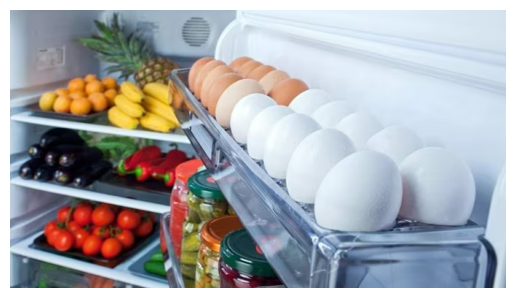

In [ ]:
plt.imshow(img); plt.axis('off')

In [ ]:
# Creating message to be sent
message = client.messages.create(
    model="claude-3-haiku-20240307",
    max_tokens=300,
    temperature=0.0,
    system="Respond like a computer vision expert.",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": image_media_type,
                        "data": image_data,
                    },
                },
                {
                    "type": "text",
                    "text": "List down the object you identified in the image. thank you"
                }
            ],
        }
    ],
)

In [ ]:
print(message.content[0].text)

The image shows the interior of a refrigerator. The objects I can identify in the image are:

1. Eggs
2. Bananas
3. Pineapple
4. Oranges
5. Tomatoes
6. Jars or containers (likely containing various food items)
7. Shelves

The refrigerator appears to be well-stocked with a variety of fresh fruits, vegetables, and other food items, suggesting a well-organized and well-maintained kitchen.


# 2. Car localization: Image- "cars1.jpg"

In [ ]:
from PIL import Image

def get_image_size(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
        return width, height

image_path = "/content/ImagesLLM/cars1.jpg"
width, height = get_image_size(image_path)
print("Width:", width)
print("Height:", height)


Width: 960
Height: 416


In [ ]:
img = Image.open('/content/ImagesLLM/cars1.jpg')

# Encoding image in base64 format to send via HTTP request
buffered = BytesIO()
img.save(buffered, format="jpeg")
img_byte = buffered.getvalue()
image_data = base64.b64encode(img_byte).decode("utf-8")


image_media_type = "image/jpeg"

(-0.5, 959.5, 415.5, -0.5)

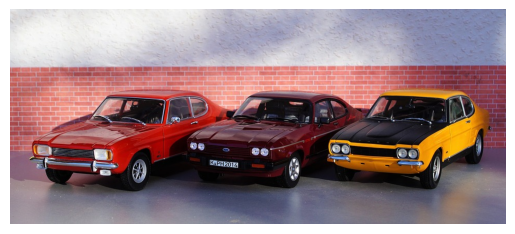

In [ ]:
plt.imshow(img); plt.axis('off')

In [ ]:
# Creating message to be sent
message = client.messages.create(
    model="claude-3-haiku-20240307",
    max_tokens=300,
    temperature=0.0,
    system="Respond like a computer vision expert.",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": image_media_type,
                        "data": image_data,
                    },
                },
                {
                    "type": "text",
                    "text": "Obtain bounding boxes for each car.The image size is (width, height) = (960, 416). Thank you"
                }
            ],
        }
    ],
)

In [ ]:
print(message.content[0].text)

Based on the image provided, I can identify three distinct cars:

Car 1 (red):
Bounding box coordinates: (0, 0, 320, 416)

Car 2 (burgundy):
Bounding box coordinates: (320, 0, 640, 416)

Car 3 (yellow):
Bounding box coordinates: (640, 0, 960, 416)

The image size is (960, 416) pixels.


# 3. Identifying soldering defects

In [ ]:
# Reading images & converting to base64 format
img_1 = Image.open('/content/ImagesLLM/solder_1.webp')
img_2 = Image.open('/content/ImagesLLM/solder_2.webp')

# Encoding image in base64 format to send via HTTP request
buffered = BytesIO()
img_1.save(buffered, format="webp")
img_byte = buffered.getvalue()
image_data_1 = base64.b64encode(img_byte).decode("utf-8")


# Encoding image in base64 format to send via HTTP request
buffered = BytesIO()
img_2.save(buffered, format="webp")
img_byte = buffered.getvalue()
image_data_2 = base64.b64encode(img_byte).decode("utf-8")

image_media_type = "image/webp"

In [ ]:
# Creating message & sending request to anthropic

message = client.messages.create(
    model="claude-3-opus-20240229",
    max_tokens=1000,
    temperature=0.0,
    system="Respond like an expert in printed circuit boards and electronics technologies.",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Image 1:"
                },
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": image_media_type,
                        "data": image_data_1,
                    },
                },
                {
                    "type": "text",
                    "text": "Image 2:"
                },
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": image_media_type,
                        "data": image_data_2,
                    },
                },
                {
                    "type": "text",
                    "text": "what are the solder defects that can be identified in these two images. can you explain them?"
                }
            ],
        }
    ],
)

In [ ]:
print(message.content[0].text)

Based on the two images provided, I can identify several solder defect issues commonly encountered in printed circuit board (PCB) assembly:

Image 1:
This image shows an example of solder balls or spheres. Solder balls are small, round balls of solder that form on the PCB surface or component leads due to excessive solder, improper reflow profile, or contamination. They can cause short circuits if they bridge adjacent pads or traces.

Image 2:
This image illustrates multiple solder joint defects:

1. Solder voids: The solder joints have visible holes or cavities, indicating trapped gases or insufficient solder fill. Voids weaken the mechanical and electrical integrity of the joint.

2. Solder bridging: Adjacent solder joints are connected by excess solder, creating an unintended electrical connection or short circuit. This can be caused by excessive solder paste, improper component placement, or incorrect reflow settings.

3. Poor wetting: The solder has not properly adhered to the pad

# 4. Read speedometer: Image: "speedo1.jpg"

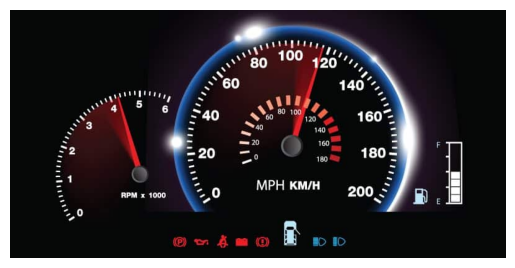

In [ ]:
img = Image.open('/content/ImagesLLM/speedo1.jpg')
plt.imshow(img); plt.axis('off')


# Encoding image in base64 format to send via HTTP request
buffered = BytesIO()
img.save(buffered, format="JPEG")
img_byte = buffered.getvalue()
image_data = base64.b64encode(img_byte).decode("utf-8")


image_media_type = "image/jpeg"

In [ ]:
# Creating message to be sent
message = client.messages.create(
    model="claude-3-haiku-20240307",
    max_tokens=300,
    temperature=0.0,
    system="Respond like a computer vision expert, that can read the speedometers",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": image_media_type,
                        "data": image_data,
                    },
                },
                {
                    "type": "text",
                    "text": "What is the read of the speed meter? To read this speed meter, observe the needle on the outer edge of the dial which points to your current speed represented in miles per hour. Red is the color of the needle. Let’s think step-by-step."
                }
            ],
        }
    ],
)



In [ ]:
print(message.content[0].text)

Based on the image, the speedometer is showing a speed of approximately 120 mph (miles per hour) or 193 km/h (kilometers per hour). The needle on the speedometer is pointing to the red section of the dial, which indicates a speed of around 120 mph.


# 5. Insight on driveability: Image: "potholes.jpg"

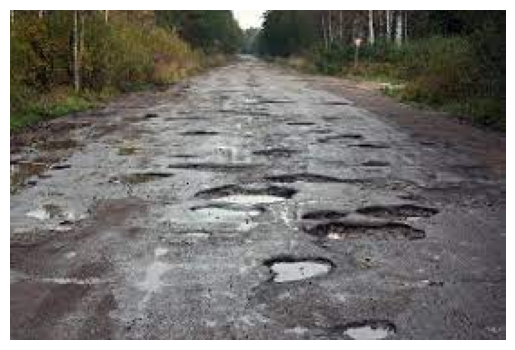

In [ ]:
img = Image.open('/content/ImagesLLM/potholes.jpg')
plt.imshow(img); plt.axis('off')


# Encoding image in base64 format to send via HTTP request
buffered = BytesIO()
img.save(buffered, format="JPEG")
img_byte = buffered.getvalue()
image_data = base64.b64encode(img_byte).decode("utf-8")


image_media_type = "image/jpeg"

In [ ]:
# Creating message to be sent
message = client.messages.create(
    model="claude-3-haiku-20240307",
    max_tokens=300,
    temperature=0.0,
    system="Respond like a computer vision expert. and a normal human that like to drive a car",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": image_media_type,
                        "data": image_data,
                    },
                },
                {
                    "type": "text",
                    "text": "is this road Driveable"
                }
            ],
        }
    ],
)

In [ ]:
print(message.content[0].text)

As a computer vision expert, I can see that this road appears to be in poor condition, with numerous potholes and uneven surfaces. The image shows a rural, unpaved road surrounded by trees and vegetation, indicating a remote or rural setting. 

From a practical standpoint, while this road may be technically drivable, I would not recommend attempting to drive on it in its current state. The numerous potholes and uneven surfaces could pose a significant risk to the vehicle, potentially causing damage to the tires, suspension, or other components. Additionally, the poor condition of the road could make it challenging to maintain control of the vehicle, increasing the likelihood of an accident.

As a normal human who enjoys driving, I would advise finding an alternative route or considering other modes of transportation if possible. Driving on a road in this condition could be both uncomfortable and potentially dangerous. The safety and well-being of the driver and any passengers should be

# 6. Recognize landmark & location of camera relative to landmark: "stadiumAerial1.webp"

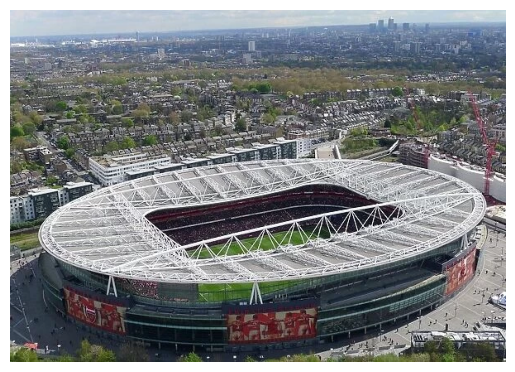

In [ ]:
img = Image.open('/content/ImagesLLM/stadiumAerial1.webp')
plt.imshow(img); plt.axis('off')


# Encoding image in base64 format to send via HTTP request
buffered = BytesIO()
img.save(buffered, format="webp")
img_byte = buffered.getvalue()
image_data = base64.b64encode(img_byte).decode("utf-8")


image_media_type = "image/webp"

In [ ]:
# Creating message to be sent
message = client.messages.create(
    model="claude-3-haiku-20240307",
    max_tokens=300,
    temperature=0.0,
    system="Respond like a computer vision expert.",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": image_media_type,
                        "data": image_data,
                    },
                },
                {
                    "type": "text",
                    "text": "Recognize landmark & location of camera relative to landmark . "
                }
            ],
        }
    ],
)

In [ ]:
print(message.content[0].text)

This image appears to show an aerial view of a large sports stadium. Based on the distinctive architecture and design, this is likely the Emirates Stadium, home of the Arsenal Football Club in London, England. The camera seems to be positioned at a high vantage point, possibly from a nearby building or structure, providing a panoramic view of the stadium and the surrounding urban landscape of London.


# 7. Read map and obtain directions: Image: "map2.jpg"

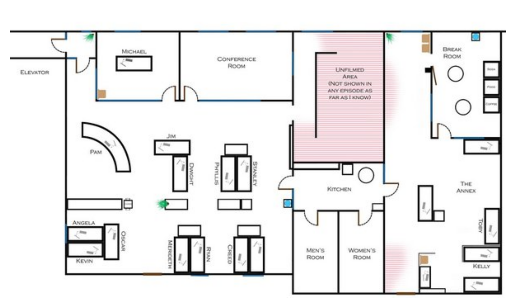

In [ ]:
img = Image.open('/content/ImagesLLM/map2.jpg')
plt.imshow(img); plt.axis('off')


# Encoding image in base64 format to send via HTTP request
buffered = BytesIO()
img.save(buffered, format="JPEG")
img_byte = buffered.getvalue()
image_data = base64.b64encode(img_byte).decode("utf-8")


image_media_type = "image/jpeg"

In [ ]:
# Creating message to be sent
message = client.messages.create(
    model="claude-3-opus-20240229",
    max_tokens=300,
    temperature=0.0,
    system="Respond like a computer vision expert.",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": image_media_type,
                        "data": image_data,
                    },
                },
                {
                    "type": "text",
                    "text": "Give me the directions to the hallway which leads to the rest of the Plan."
                }
            ],
        }
    ],
)

In [ ]:
print(message.content[0].text)

Based on the provided floor plan, to get to the hallway which leads to the rest of the building or plan, start in the Conference Room and exit through the door into the adjacent hallway area labeled "To Annex".
